# **Gemini API Walkthrough**

## **What's Covered?**
1. Introduction to GoogleAI
    - Historical Understanding
    - Why use Gemini?
    - How To access Gemini Model
2. Gemini Setup
    - Available Models
    - Pricing
    - Accessing Gemini Chatbot
    - Installation
    - Importing and Setting the API Key
3. API Hands-on
    - Text Generation with Gemini
    - How to structure contents argument for generate_content?
    - Adding a System Prompt
4. Advanced Usage
    - Adding a System Prompt with `types.GenerationConfig`
    - Model's Inference Parameters
    - Streaming Response
    - Multimodal Capabilities - Image Understanding
5. Embeddings
    - abc
    - xyz

## **Introduction to GoogleAI**

### **Historical Understanding**
Launched in December 2023 after PaLM (Pathways Language Model) and LaMDA (Large Language Model for Dialogue Applications).

You can use Gemini chatbot which was formally known as Bard. Google announced Bard in February 2023 as a GenAI chatbot powered by LaMDA. Later chatbot switched to PaLM model before finally switching to the Gemini model. 

### **Why use Gemini?**
Let's list down a few reasons as why you might want to choose Gemini.
- **Context Window:** In May 2024, Gemini 1.5 was updated with a context window of 2 million tokens. To put that in perspective, 2 million tokens can  process up to 2 hours of video, 22 hours of audio, 60K lines of code, or 1.4 million words of text.
- **Multimodal Capabilities:** Works with text, images and videos.
- **Variety of options:** Variants: Ultra, Pro, Flash and Nano.
- **Generous free offerings:** Offers a free to use option.

### **How To access Gemini Model**
Google offers two types of APIs to access generative AI capabilities in applications. These offer distinct features and benefits:
1. **Google Vertex AI Gemini API**
    - The Google Vertex AI Gemini API is part of Google Cloud’s suite of AI services.
    - It offers a wide range of functionalities that extend beyond the Gemini model.
    - It integrates with Vertex AI, which is Google’s unified platform for managing and deploying models.
> The Gemini API for Vertex AI doesn't use API keys instead it uses identity and access management (IAM) to manage access.

2. **Google AI Gemini API**
    - The Google AI Gemini API is a REST API that provides access to Google Gemini models.
    - Google AI Gemini API works with both textual and image inputs to generate responses from the different Gemini model variants.

## **Gemini Setup**

### **Available Models**

[Click here](https://ai.google.dev/gemini-api/docs/models) to explore available models.

### **Pricing**
Click here to explore the [Pricing](https://ai.google.dev/pricing).

### **Accessing Gemini Chatbot**

[Gemini Chatbot](https://gemini.google.com/app)

### **Installation**
To start using Gemini Model's, first install google sdk using the following command:

```python
! pip install google-genai
```

In [1]:
# ! pip install google-genai

### **Importing and Setting the API Key**

In [18]:
from google import genai

f = open("keys/.gemini.txt")
key = f.read()

client = genai.Client(api_key=key)

## **API Hands-on**

### **Text Generation with Gemini**

In [3]:
response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=[
        "Explain how AI works in a single line?"
    ],
)

print(response.text)

AI works by using mathematical algorithms to identify patterns in vast amounts of data and making predictions or decisions based on those patterns.


### **How to structure `contents` argument for `generate_content`?**

In [5]:
from google import genai
from google.genai import types

response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=[
        types.Part.from_text(text='Explain how AI works in a single line?')
    ],
)

print(response.text)

AI processes vast amounts of data to identify patterns and make calculated predictions or decisions.


### **Adding a System Prompt**

**Important Note:** System Prompt can be specified using `system_instruction`. `system_instruction` is not enabled for models/gemini-pro.

In [6]:
from google import genai

custom_config = {
    "system_instruction" : "You are helpful AI Assistant. You answer user's query in a single line.",
}

response = client.models.generate_content(
    model="gemini-3-flash-preview",
    config=custom_config,
    contents=[
        types.Part.from_text(text='Explain transformer algorithm?')
    ],
)

print(response.text)

The Transformer is a deep learning architecture that uses self-attention mechanisms to process entire sequences of data in parallel, efficiently capturing complex relationships between distant elements.


## **Advanced Usage**

### **Adding a System Prompt with `types.GenerationConfig`**

Configuration options for model generation and outputs. Not all parameters are configurable for every model.

In [9]:
from google import genai
from google.genai import types

custom_config = types.GenerateContentConfig(
    system_instruction="You are helpful AI Assistant. You answer user's query in a single line.",
)

response = client.models.generate_content(
    model="gemini-3-flash-preview",
    config=custom_config,
    contents=[
        types.Part.from_text(text='Explain transformer algorithm?')
    ],
)

print(response.text)

The Transformer is a deep learning architecture that uses self-attention mechanisms to process sequence data in parallel, allowing it to weigh the importance of different words in a sentence regardless of their distance.


### **Model's Inference Parameters**

**Reference - [HuggingFace Blog](https://huggingface.co/blog/how-to-generate)**

If you run the above code few times, you will notice that the output changes across runs. Generative models are **non-deterministic**. This means that even with the same input they can produce different outputs. This behavior allows for creativity and diversity in the generated outputs, which can be great when trying to generate different creative styles. There are parameters which can help us control this behavior like temperature, top_p, etc...

- **temperature:** It act as a control knob that influences the randomness of the model's output. A higher temperature value will result in a more varied and creative response. Lower values would be more effective in returning predictable results with an LLM.
- **top_p:** Range from [0.0, 1.0]. This is also known a **nucleus sampling**. The LLM only considers the next word options that cumulatively add up to a probability of reaching or exceeding the `top_p` value. A higher value will create looser threshold. This will allow the model to consider a wider range of probable options while still prioritizing the most likely ones. A lower `top_p` value will create a stricter threshold, leading to less diverse and more predictable outputs.
- **top_k:** This parameter limits the number of possible next words to the `k` most probable options based on the probability distribution. A lower `k` value restricts the selection to a smaller pool of the most likely words, leading to less diverse and more predictable outputs.

Both `top_p` and `top_k` works in conjunction with the `temperature` parameter.

In [10]:
from google import genai
from google.genai import types

custom_config = types.GenerateContentConfig(
    system_instruction="You are helpful AI Assistant. You answer user's query in a single line.",
    temperature=1,
    top_p=0.8,
)

response = client.models.generate_content(
    model="gemini-3-flash-preview",
    config=custom_config,
    contents=[
        types.Part.from_text(text='Explain transformer algorithm?')
    ],
)

print(response.text)

The Transformer is a deep learning architecture that uses self-attention mechanisms to process sequential data in parallel, enabling it to capture complex relationships and long-range dependencies more efficiently than traditional recurrent neural networks.


### **Streaming Response**

In [11]:
from google import genai
from google.genai import types

custom_config = types.GenerateContentConfig(
    system_instruction="You are helpful AI Assistant. You answer user's query in a single line.",
    temperature=1,
    top_p=0.8,
)

for chunk in client.models.generate_content_stream(
    model="gemini-3-flash-preview",
    config=custom_config,
    contents=[
        types.Part.from_text(text='Explain transformer algorithm?')
    ],
):
    print(chunk.text, end="")

The transformer is a deep learning architecture that uses self-attention mechanisms to process input data in parallel, capturing long-range dependencies and serving as the foundation for modern large language models.

### **Multimodal Capabilities - Image Understanding**

Gemini models are built to be multimodal from the ground up, unlocking a wide range of image processing and computer vision tasks including but not limited to image captioning, classification, and visual question answering without having to train specialized ML models.

You can provide images as input to Gemini using two methods:
- **Passing inline image data:** Ideal for smaller files (total request size less than 20MB, including prompts).
- **Uploading images using the File API:** Recommended for larger files or for reusing images across multiple requests.

In [12]:
from google import genai
from google.genai import types

with open('images/image_astro.JPG', 'rb') as f:
  image_bytes = f.read()

context = [
    types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/jpeg',
    ),
]

response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=context,
)

print(response.text)

This image features a surreal and whimsical scene. Here is a detailed breakdown:

**Subject and Action:**
The central focus is a figure in a full, white NASA-style spacesuit, complete with a helmet and dark visor. The astronaut is sitting in the driver's seat of a white vehicle, with their hands positioned on a black steering wheel.

**The Vehicle:**
The vehicle is a boxy, white truck or van, bearing a strong resemblance to a standard United States Postal Service (USPS) delivery truck (Long Life Vehicle). 
*   It has a row of several round red and orange lights across the top of the windshield.
*   The front features a plain grey rectangular grill and standard headlights.
*   There are prominent blue stripes running along the side of the white body.

**Setting and Background:**
The scene is set in a vibrant, sunlit outdoor environment.
*   **Foreground:** In the bottom left, there are large, bright yellow and orange flowers (resembling marigolds).
*   **Midground:** The truck is parked

In [13]:
from google import genai
from google.genai import types

context = [
    types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/jpeg',
    ),
    types.Part.from_text(
        text="what is the color of astronaut's suit?"
    )
]


response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=context,
)

print(response.text)

The color of the astronaut's suit is white.


In [14]:
# ! pip install pillow matplotlib

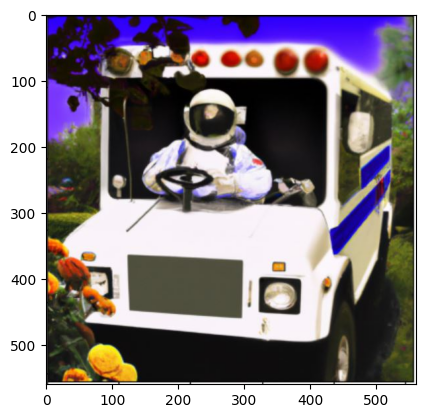

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images/image_astro.JPG")

plt.imshow(img)

## **Embeddings**

### **About Gemini Embedding Model**
- **Model Code:** gemini-embedding-001
- **Supported Input Type:** Text
- **Input token limit:** 2048
- **Output dimension size:** 128 - 3072

**Note:** This is updated as of 12th Feb, 2026

In [22]:
result = client.models.embed_content(
        model="gemini-embedding-001",
        contents="What is the meaning of life?"
)

print(result.embeddings)

[ContentEmbedding(
  values=[
    -0.022374554,
    -0.004560777,
    0.013309286,
    -0.0545072,
    -0.02090443,
    <... 3067 more items ...>,
  ]
)]


In [23]:
result = client.models.embed_content(
    model="gemini-embedding-001",
    contents="What is the meaning of life?",
    config=types.EmbedContentConfig(output_dimensionality=768)
)

[embedding_obj] = result.embeddings
embedding_length = len(embedding_obj.values)

print(f"Length of embedding: {embedding_length}")


Length of embedding: 768
